<a href="https://colab.research.google.com/github/somesh-kb/Swarm-Data-Analysis/blob/main/Swarm_Data_Analysis_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np 

# **Read the input files**

In [4]:
file_align = pd.read_csv(r'/content/drive/MyDrive/Boid_Swarm_Data/Aligned.csv')
df_align = pd.DataFrame(file_align)

In [5]:
print(df_align.head(10))

        x1      y1  xVel1  yVel1   xA1  ...  xC200  yC200  nAC200  nS200  Class
0 -1414.14 -535.22 -17.88  -7.23  0.00  ...   0.00   0.00      29      0      0
1 -1412.93  597.54 -13.55  -5.48  0.00  ...   0.00   0.00      44      0      0
2 -1407.38   70.72 -14.37  -5.81  0.00  ...   0.00   0.00      40      0      0
3 -1407.00 -759.80  -7.59  -1.27 -0.98  ...  -0.52   0.86       3      0      1
4 -1406.36  698.39 -16.54  -6.95 -1.00  ...   0.00   0.00      13      0      0
5 -1405.34 -796.19 -11.18  -4.52  0.00  ...   0.00   0.00      17      1      0
6 -1405.05  645.56  -9.01  -1.16  0.00  ...  -0.02   1.00       1      0      1
7 -1405.00  993.01  -5.41  -3.96  0.00  ...   0.00   0.00       0      0      0
8 -1404.81  939.49  -5.44  -2.20  0.00  ...   0.00   0.00      27      1      0
9 -1404.73 -189.29  -8.37  -3.17 -0.56  ...  -0.30   0.10      16      0      1

[10 rows x 2401 columns]


In [6]:
df_align['Class'].unique()
df_align['Class'].value_counts()

0    16511
1     7505
Name: Class, dtype: int64

In [7]:
print(df_align.shape)

(24016, 2401)


In [8]:
print(df_align.describe())

                 x1            y1  ...        nS200         Class
count  24016.000000  24016.000000  ...  24016.00000  24016.000000
mean     108.310513    -73.077114  ...      2.14736      0.312500
std      842.175333    572.552115  ...      7.53273      0.463522
min    -1414.140000  -1012.180000  ...      0.00000      0.000000
25%     -539.662500   -609.352500  ...      0.00000      0.000000
50%      156.085000   -156.685000  ...      0.00000      0.000000
75%      898.112500    424.445000  ...      1.00000      1.000000
max     1406.080000   1015.800000  ...     65.00000      1.000000

[8 rows x 2401 columns]


In [9]:
print(df_align.dtypes)

x1        float64
y1        float64
xVel1     float64
yVel1     float64
xA1       float64
           ...   
xC200     float64
yC200     float64
nAC200      int64
nS200       int64
Class       int64
Length: 2401, dtype: object


In [10]:
Y= df_align['Class']
X = df_align.drop(['Class'],axis=1)

In [11]:
print(X.shape)

(24016, 2400)


In [12]:
from sklearn.preprocessing import StandardScaler,Normalizer

ss = StandardScaler()

Xss = ss.fit_transform(X)

print(Xss)

[[-1.8077972  -0.80717981 -2.65979237 ... -0.13947491  0.08063396
  -0.28507658]
 [-1.80636042  1.17130137 -1.98796576 ... -0.13947491  0.52185854
  -0.28507658]
 [-1.7997702   0.25115636 -2.11519389 ... -0.13947491  0.40419866
  -0.28507658]
 ...
 [ 1.5389865   0.37968882  1.19739228 ... -0.13947491 -0.62532536
  -0.15231982]
 [ 1.53925961 -0.42350369  1.12291727 ... -0.13947491 -0.74298525
  -0.28507658]
 [ 1.54100513 -0.49156878  1.66596419 ... -0.26990458 -0.77240022
  -0.28507658]]


In [13]:
from sklearn.decomposition import PCA



pca = PCA(n_components=0.95)

pca.fit(Xss)

Z = pca.transform(Xss)
print(Z)

[[-11.56712802  -0.18108254 -11.15037491 ...  -0.52370035   0.71638231
    0.14273308]
 [-11.53780002  -0.15190809 -10.72767892 ...   0.46346449   0.22673795
   -0.37887615]
 [-11.02441902   0.86510374 -11.17518334 ...   0.30427486   0.89717232
   -0.35284091]
 ...
 [  5.06297997  -5.9621429   -6.65906255 ...  -0.85509957  -0.11057398
    0.41794927]
 [  3.9539594   -6.42860559  -6.24460545 ...  -0.45412174  -0.39671027
   -0.05442894]
 [ -2.62428503  -7.74232956  -7.91570031 ...  -0.42802649   0.61996964
    0.41549629]]


In [14]:
print(Z.shape)

(24016, 750)


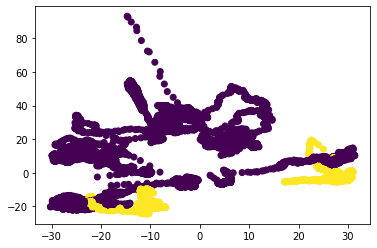

In [15]:
import matplotlib.pyplot as plt 

plt.scatter(Z[:,0],Z[:,1],c=Y)
#plt.scatter(Z[:,2],Z[:,3],c=Y)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split 

X_train,X_test,Y_train,Y_test = train_test_split(Z,Y,test_size=0.25,random_state=1225)

In [17]:
from sklearn.svm import SVC 

svc = SVC()

print(svc.get_params)

<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>


In [18]:
from sklearn.model_selection import RandomizedSearchCV

C = [x for x in np.arange(0.1,5,0.05)]

coef0 = [x for x in np.arange(0.0,1.5,0.05)]

degree =[int(x) for x in np.arange(2,15,1)]

kernel=['linear','poly','rbf','sigmoid']

decision_function_shape = ['ovo', 'ovr']

#tol = [x for x in np.arange(0.0005,0.001,0.0001)]
param_grid = {'C':C, 'coef0':coef0, 'kernel':kernel, 'decision_function_shape':decision_function_shape}

rs_cv = RandomizedSearchCV(estimator=svc,param_distributions=param_grid,cv=10,n_iter=100,random_state=25,n_jobs=-1)
rs_cv.fit(X_train,Y_train)
print(rs_cv.best_params_)

{'kernel': 'rbf', 'decision_function_shape': 'ovo', 'coef0': 0.8500000000000001, 'C': 1.4500000000000006}


In [19]:
svc = SVC(kernel='rbf',decision_function_shape= 'ovo', coef0= 0.8500000000000001, C= 1.4500000000000006)
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test,Y_pred))

[[4087    0]
 [   0 1917]]


In [21]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4087
           1       1.00      1.00      1.00      1917

    accuracy                           1.00      6004
   macro avg       1.00      1.00      1.00      6004
weighted avg       1.00      1.00      1.00      6004



In [24]:
print(Y_test.value_counts())

0    4087
1    1917
Name: Class, dtype: int64
